In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, pacf
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.random.seed(123456)

In [15]:
data = pd.read_csv('BTC-USD.csv')

# Data Cleaning

In [20]:
data = data.dropna()

data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', drop = True, inplace = True)

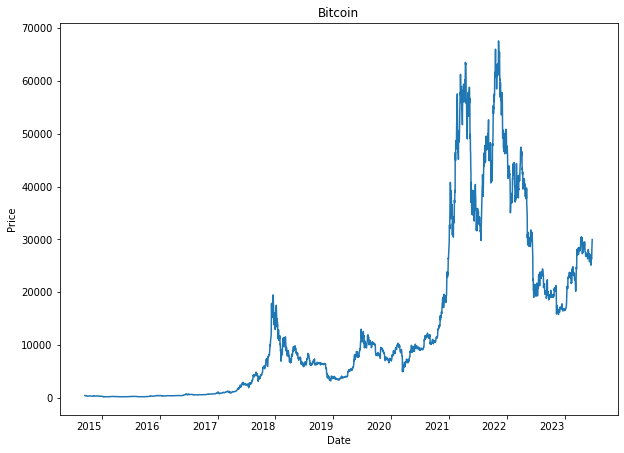

In [21]:
plt.figure(figsize = (10, 8))
data.Close.plot()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin')
plt.xticks(rotation = 0)
plt.show()

# Autocorrelation function
### detect if bitcoin is nonstationary

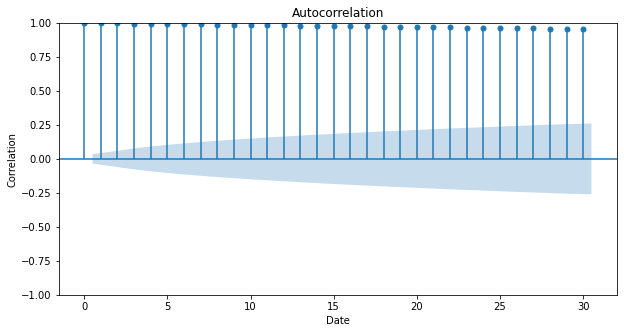

In [22]:
fig, axes = plt.subplots(figsize = (10, 5))
plot_acf(data.Close, axes, lags = 30)
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.show()

# Create difference column getting stationary data
$$p = \frac{t_n - t_{n-1}}{t_{n-1}}$$

In [28]:
data['diffs'] = (data.Close.diff() / data.Close.shift(periods = 1, fill_value = 0)).fillna(0)

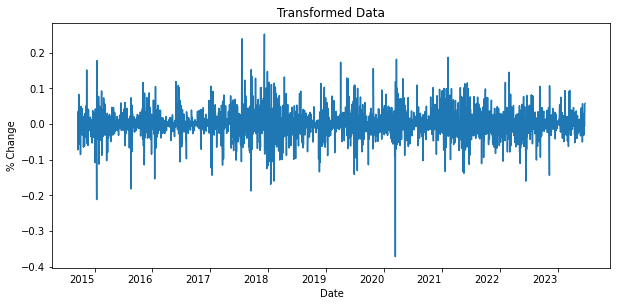

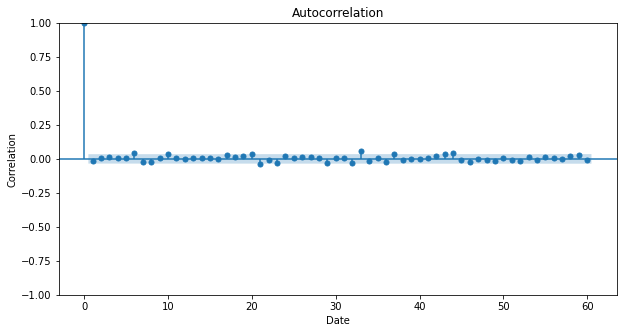

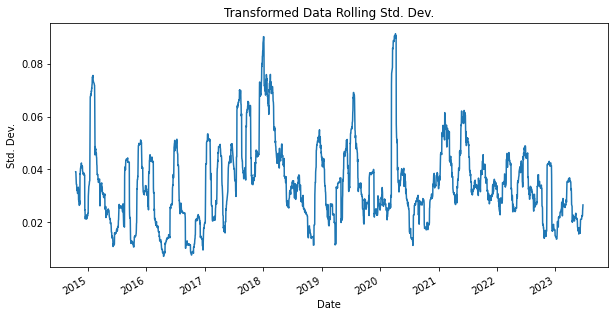

In [24]:
plt.figure(figsize = (10, 5))
data.diffs.plot()
plt.xlabel('Date')
plt.ylabel('% Change')
plt.title('Transformed Data')
plt.xticks(rotation = 0)
plt.show()

fig, axes = plt.subplots(figsize = (10, 5))
plot_acf(data.diffs, axes, lags = 60)
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.show()

plt.figure(figsize = (10, 5))
data.diffs.rolling(30).std().plot()
plt.xlabel('Date')
plt.ylabel('Std. Dev.')
plt.title('Transformed Data Rolling Std. Dev.')
plt.show()

In [34]:
lr = LinearRegression()
diffs = (data.Close.diff() / data.Close.shift(periods = 1, fill_value = 0)).values[1:]

diffs_len = len(diffs)

3199